# 生成单球壳图片

In [2]:
import h5py
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [10]:

for idx_of_gen_traindata in [10,11,12,13,14,15,16,17,18,19]:#这里修改数据集序号
    R_list = []
    Beta_list = []
    Electrons_list = []
    inputs = []
    # 读取数据
    gen_data = h5py.File(f'train{idx_of_gen_traindata}_ele_info.h5','r')
    print(f'train{idx_of_gen_traindata}_ele_info.h5')
    for i in list(gen_data.keys()):
        # print(gen_data[i]['Electrons'][:])
        R_list.append(gen_data[i]['R'][:][1])
        Beta_list.append(gen_data[i]['Beta'][:12])
        Electrons_list.append(gen_data[i]['Electrons'][:])
    gen_data.close()

    # 生成图片
    
    for todo_elc in tqdm(Electrons_list):
        ccd = np.zeros((1024,1024),dtype=np.float64)
        for electron in todo_elc:
            x = int(electron[1]*512)+512
            y = int(electron[2]*512)+512
            ccd[x][y] += 1
        ccd =  ccd/len(todo_elc)*255
        inputs.append(ccd)
    labels = Beta_list
    Rs = R_list
    # 存数据
    with h5py.File(f'dataset_{idx_of_gen_traindata}.h5','w') as out:
        out['inputs'] = inputs
        out['labels'] = labels
        out['R'] = Rs

train10_ele_info.h5


100%|██████████| 100/100 [05:05<00:00,  3.06s/it]


train11_ele_info.h5


100%|██████████| 100/100 [05:01<00:00,  3.01s/it]


train12_ele_info.h5


100%|██████████| 100/100 [05:04<00:00,  3.05s/it]


train13_ele_info.h5


100%|██████████| 100/100 [05:04<00:00,  3.04s/it]


train14_ele_info.h5


100%|██████████| 100/100 [05:05<00:00,  3.05s/it]


train15_ele_info.h5


100%|██████████| 100/100 [05:05<00:00,  3.06s/it]


train16_ele_info.h5


100%|██████████| 100/100 [05:05<00:00,  3.05s/it]


train17_ele_info.h5


100%|██████████| 100/100 [05:06<00:00,  3.06s/it]


train18_ele_info.h5


100%|██████████| 100/100 [05:06<00:00,  3.06s/it]


train19_ele_info.h5


100%|██████████| 100/100 [05:05<00:00,  3.06s/it]


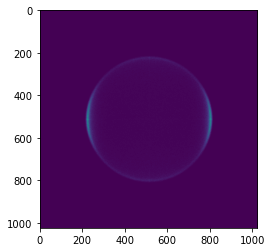

In [37]:
with h5py.File('dataset_10.h5','r') as out:
    inputs = out['inputs'] 
    ccd = inputs[0][:]
plt.imshow(ccd)